In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('data/data.xlsx', sheet_name = '1st Trial', names = ['time (min)', 'm_xylene', 'NO', 'NO2', 'NOx', 'NOx/m_xy', 'beta', 'NO,NO2 crossing time (min)', 'Wall loss factor', 'Peak O3 Concentration', '50% of Final M0 Time', 'PeakDp', 'deltaHC', 'm_xy consume ratio', 'deltaHC / beta', 'deltaHC * beta', 'M0', 'yield'])


In [2]:
X = (data['m_xylene'] * data['deltaHC / beta']).to_numpy().reshape(-1, 1)
y = data['M0'].to_numpy().reshape(-1, 1)
corr = np.round((data['m_xylene'] * data['deltaHC / beta']).corr(data['M0']), 3)
model = LinearRegression()
reg = model.fit(X, y)
coef = reg.coef_
intercept = reg.intercept_

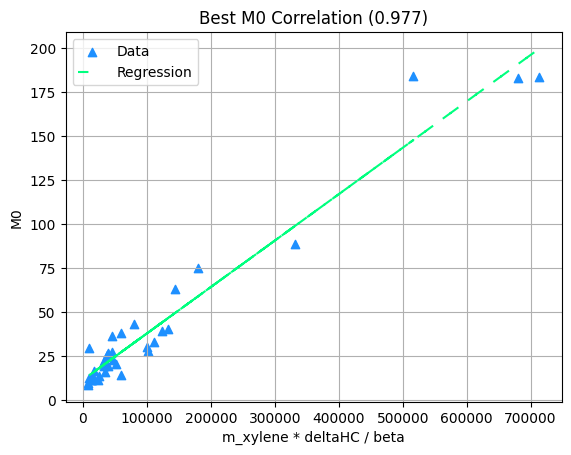

In [3]:
plt.scatter(X, y, label = 'Data', color = 'dodgerblue', marker = '^')
plt.xlabel('m_xylene * deltaHC / beta')
plt.ylabel('M0')
plt.title(f'Best M0 Correlation ({corr})')

plt.plot(X, X @ coef + intercept, label = 'Regression', color = 'springgreen', linestyle = (0, (5, 10)))

plt.legend()
plt.grid()

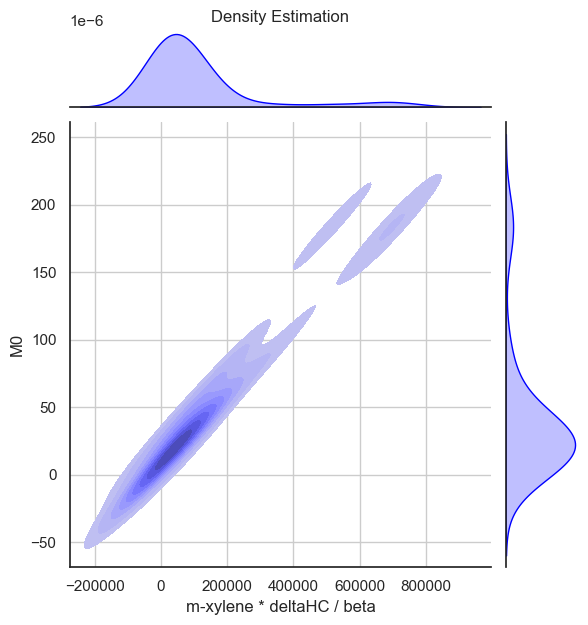

In [4]:
sns.set(style = 'white')
g = sns.jointplot(x = data['m_xylene'] * data['deltaHC / beta'], y = data['M0'], data = data, kind = 'kde', height = 6, color = 'blue', fill = True)

g.ax_joint.set_xlabel('m-xylene * deltaHC / beta', fontsize = 12)
g.ax_joint.set_ylabel('M0', fontsize = 12)
g.ax_marg_x.set_title('Density Estimation')

#sns.despine(left = True, bottom = True)
plt.grid()
plt.show()

In [5]:
X = (data['PeakDp'] / data['50% of Final M0 Time']).to_numpy().reshape(-1, 1)
y = data['yield'].to_numpy().reshape(-1, 1)
corr = np.round((data['PeakDp'] / data['50% of Final M0 Time']).corr(data['yield']), 3)
model = LinearRegression()
reg = model.fit(X, y)
coef = reg.coef_
intercept = reg.intercept_

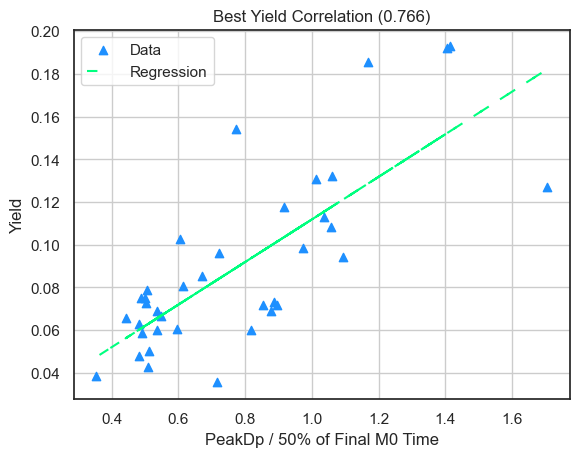

In [6]:
plt.scatter(X, y, label = 'Data', color = 'dodgerblue', marker = '^')
plt.xlabel('PeakDp / 50% of Final M0 Time')
plt.ylabel('Yield')
plt.title(f'Best Yield Correlation ({corr})')

plt.plot(X, X @ coef + intercept, label = 'Regression', color = 'springgreen', linestyle = (0, (5, 10)))

plt.legend()
plt.grid()

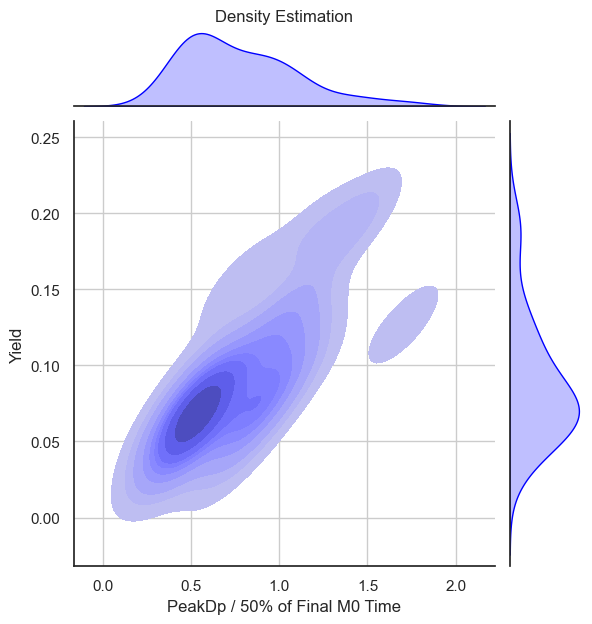

In [7]:
sns.set(style = 'white')
g = sns.jointplot(x = data['PeakDp'] / data['50% of Final M0 Time'], y = data['yield'], data = data, kind = 'kde', height = 6, color = 'blue', fill = True)

g.ax_joint.set_xlabel('PeakDp / 50% of Final M0 Time', fontsize = 12)
g.ax_joint.set_ylabel('Yield', fontsize = 12)
g.ax_marg_x.set_title('Density Estimation')

#sns.despine(left = True, bottom = True)
plt.grid()
plt.show()